# Breast Cancer Survival Predictor

### Importing CSV and setting variables

In [69]:
# Model is references from WGU Jim Ashe's Supervised Classification App and tutorial
import pandas as pd
df = pd.read_csv('Breast_Cancer.csv')
df = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]], axis=1)

X = df.drop(columns=['Status'])
y = df[['Status']].copy()

import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

### Creating and training model

In [71]:
from sklearn import svm

svm_model = svm.SVC(gamma='scale', C=1)
y_train_array, y_test_array = y_train['Status'].values, y_test['Status'].values
svm_model.fit(X_train,y_train_array.ravel()) 

SVC(C=1)

### Accuracy on training data

In [73]:
from sklearn import metrics
predictions = svm_model.predict(X_train)
score = metrics.accuracy_score(y_train, predictions)
score

0.8919523099850969

### Accuracy on test data

In [108]:
predictions_test = svm_model.predict(X_test)
score2 = metrics.accuracy_score(y_test,predictions_test)
score2

0.8902985074626866

# Interactive predictor

#### Input age, tumor size, and number of months survived to predict whether a breast cancer patient is alive or not.

In [78]:
import ipywidgets as widgets

age_widget = widgets.FloatText(description='Age:', value='0')
tumorsize_widget = widgets.FloatText(description='Tumor Size:', value='0')
survivalmonths_widget = widgets.FloatText(description='Survival Months:', value='0')

button_predict = widgets.Button(description='Predict')
button_output = widgets.Label(value='Enter values and press "Predict".')

def on_click(b):
    prediction = svm_model.predict([[
        age_widget.value, tumorsize_widget.value, survivalmonths_widget.value]])
    button_output.value='Prediction = ' + str(prediction[0])
button_predict.on_click(on_click)
 
vb=widgets.VBox([age_widget, tumorsize_widget, survivalmonths_widget, button_predict, button_output])
display(vb)

# Graphs and charts for data analysis

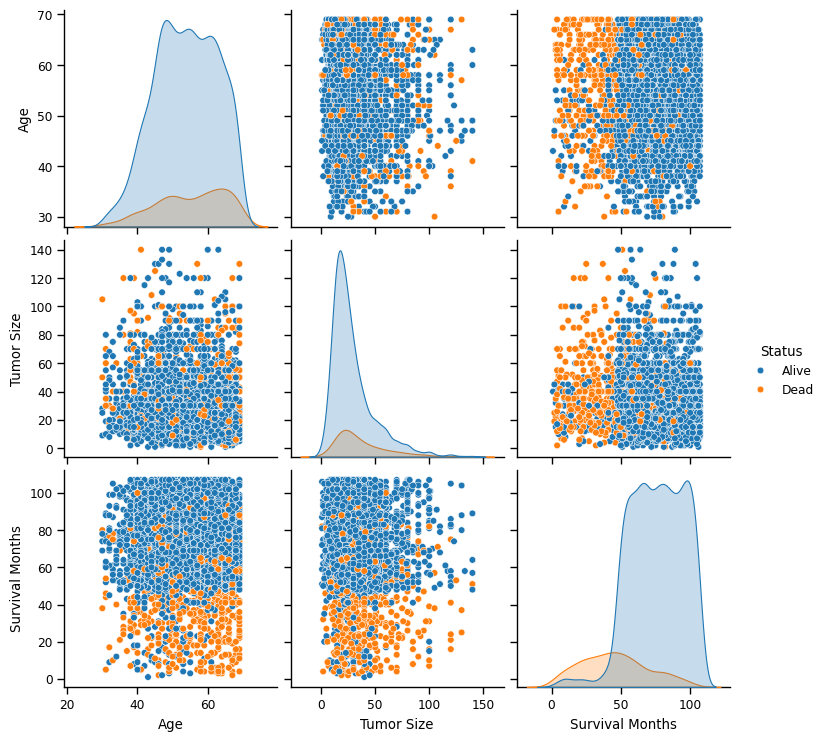

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='Status')
plt.show()

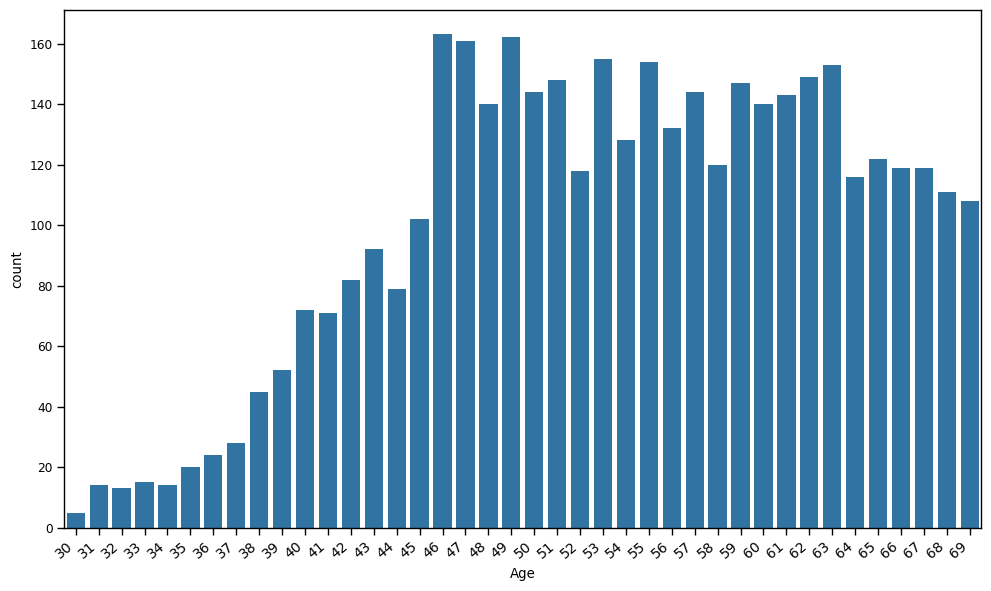

In [81]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


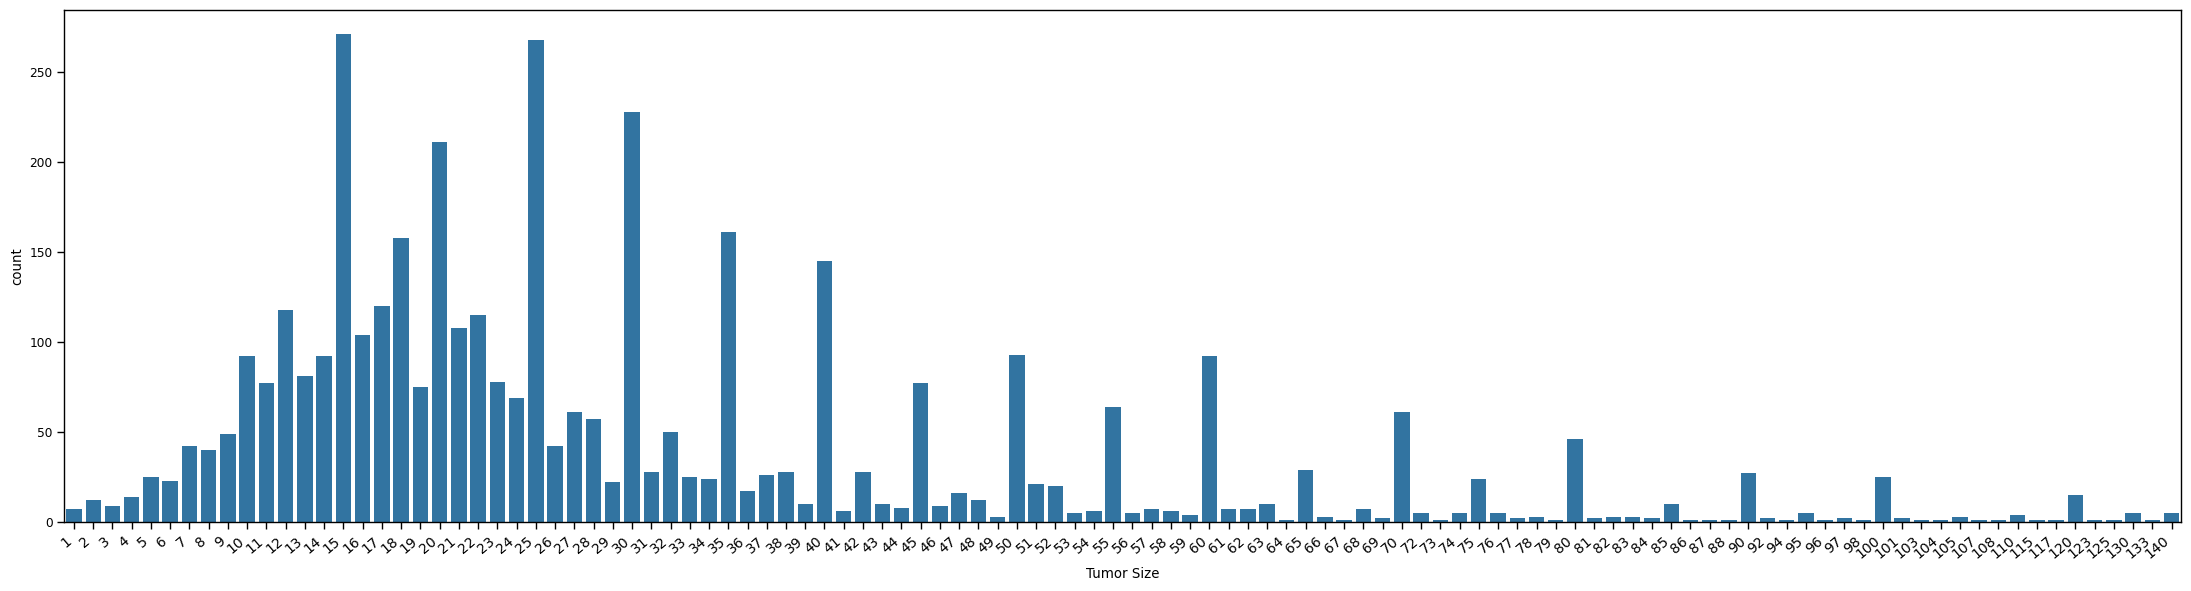

In [82]:
plt.figure(figsize=(22, 6))
ax = sns.countplot(x='Tumor Size', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

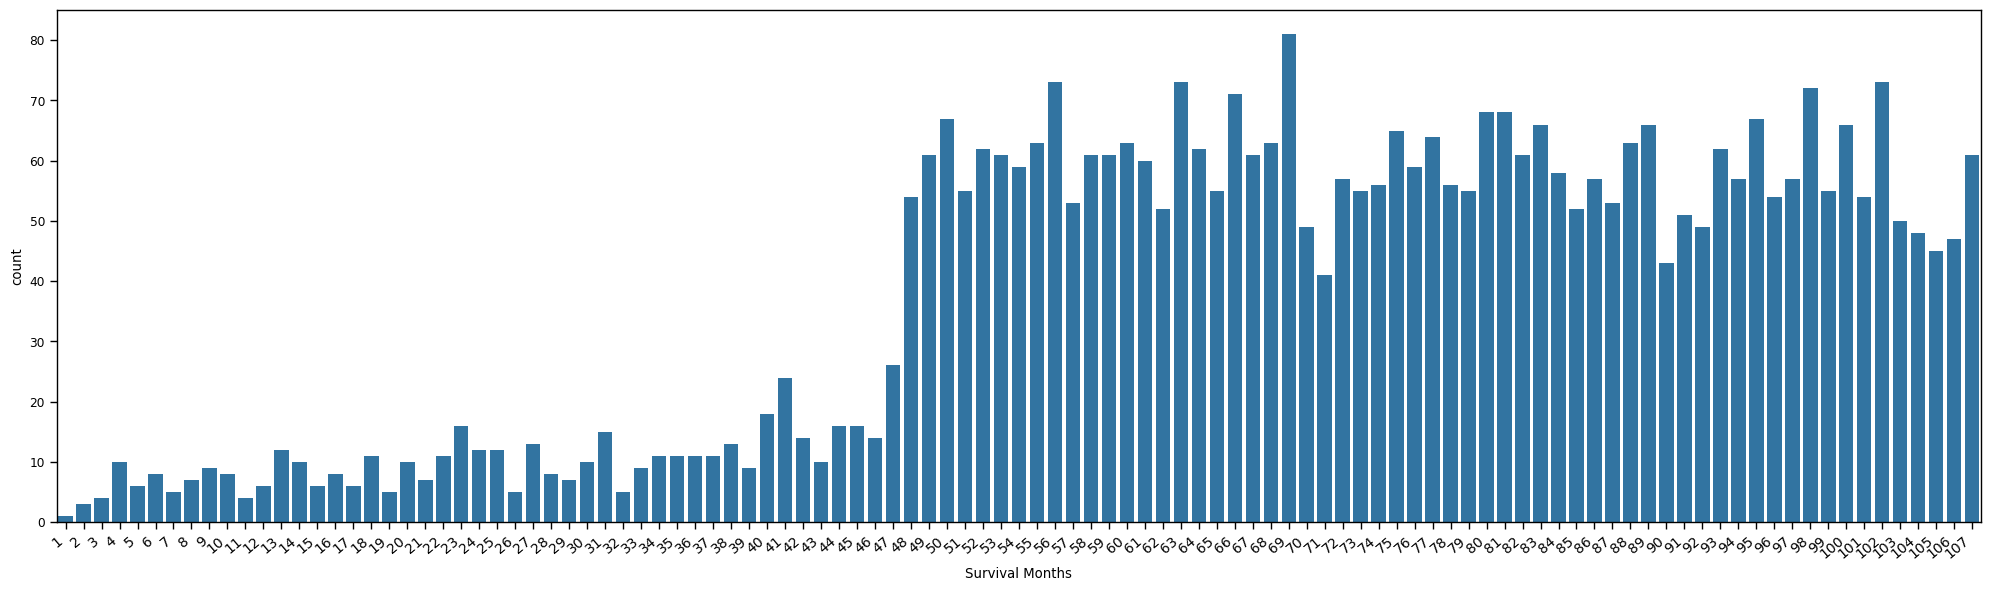

In [106]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Survival Months', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

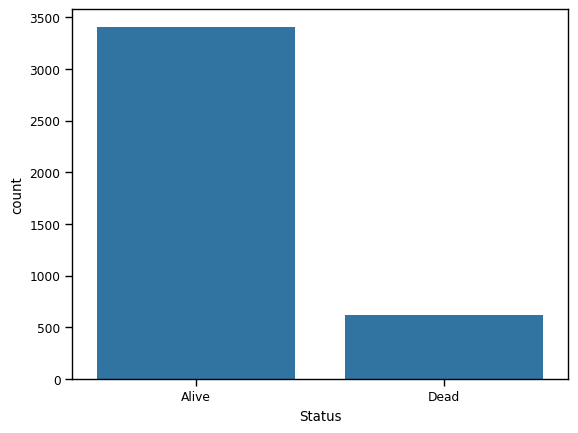

In [83]:
ax = sns.countplot(x='Status', data=df)
plt.show()

In [84]:
df.describe(include='all')

,Age,Tumor Size,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Alive
freq,NaN,NaN,NaN,3408
mean,53.972167,30.473658,71.297962,NaN
std,8.963134,21.119696,22.921430,NaN
min,30.000000,1.000000,1.000000,NaN
25%,47.000000,16.000000,56.000000,NaN
50%,54.000000,25.000000,73.000000,NaN
75%,61.000000,38.000000,90.000000,NaN
